# D83-1
* **試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異**
* **請嘗試將 BN 放在 Activation 之前，並比較訓練結果**
* **請於 BN 放在 Input Layer 後，並比較結果**

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

/home/rex/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [64, 128, 256]
MOMENTUM = 0.95

In [9]:
results = {}
for BT in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BT, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    bt_name_tag = "BATCH_SIZE-%s" % str(BT)
    results[bt_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 19s 390us/step - loss: 0.6328 - acc: 0.7704 - val_loss: 1.8975 - val_acc: 0.4692
Epoch 50/50
50000/50000 [==============================] - 18s 366us/step - loss: 0.6275 - acc: 0.7753 - val_loss: 2.0018 - val_acc: 0.4695
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
______

50000/50000 [==============================] - 10s 206us/step - loss: 0.4284 - acc: 0.8460 - val_loss: 2.1551 - val_acc: 0.5030
Epoch 48/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.4308 - acc: 0.8442 - val_loss: 2.3556 - val_acc: 0.4855
Epoch 49/50
50000/50000 [==============================] - 10s 208us/step - loss: 0.4121 - acc: 0.8510 - val_loss: 2.3758 - val_acc: 0.4709
Epoch 50/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.4037 - acc: 0.8556 - val_loss: 2.3418 - val_acc: 0.4841
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2

50000/50000 [==============================] - 6s 129us/step - loss: 0.2877 - acc: 0.8969 - val_loss: 2.5949 - val_acc: 0.4800
Epoch 46/50
50000/50000 [==============================] - 6s 130us/step - loss: 0.2684 - acc: 0.9047 - val_loss: 2.7880 - val_acc: 0.4725
Epoch 47/50
50000/50000 [==============================] - 6s 130us/step - loss: 0.2708 - acc: 0.9037 - val_loss: 2.7023 - val_acc: 0.4832
Epoch 48/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.2596 - acc: 0.9094 - val_loss: 2.6226 - val_acc: 0.4916
Epoch 49/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.2493 - acc: 0.9113 - val_loss: 3.0572 - val_acc: 0.4544
Epoch 50/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.2448 - acc: 0.9115 - val_loss: 2.7053 - val_acc: 0.4861


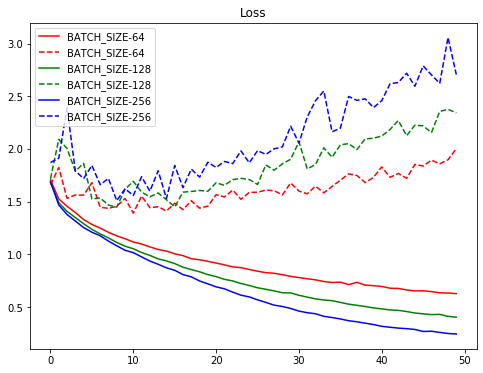

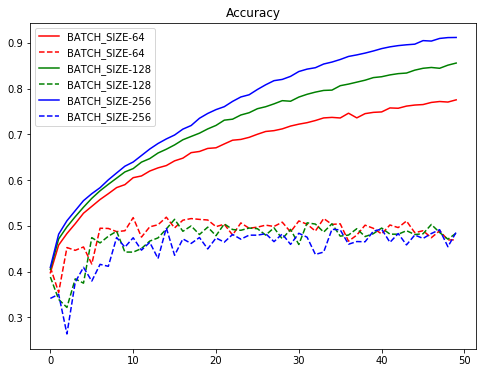

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [15]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [64, 128, 256]

In [17]:
results = {}
for BT in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BT, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    bt_name_tag = "BATCH_SIZE-%s" % str(BT)
    results[bt_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________

50000/50000 [==============================] - 18s 365us/step - loss: 0.5281 - acc: 0.8091 - val_loss: 2.0056 - val_acc: 0.4933
Epoch 50/50
50000/50000 [==============================] - 18s 364us/step - loss: 0.5239 - acc: 0.8090 - val_loss: 2.1635 - val_acc: 0.4746
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______

50000/50000 [==============================] - 11s 220us/step - loss: 0.3627 - acc: 0.8694 - val_loss: 2.5347 - val_acc: 0.4695
Epoch 48/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.3531 - acc: 0.8722 - val_loss: 2.4787 - val_acc: 0.4889
Epoch 49/50
50000/50000 [==============================] - 11s 215us/step - loss: 0.3427 - acc: 0.8760 - val_loss: 2.6757 - val_acc: 0.4580
Epoch 50/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.3423 - acc: 0.8755 - val_loss: 2.6525 - val_acc: 0.4677
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2

50000/50000 [==============================] - 8s 158us/step - loss: 0.2621 - acc: 0.9072 - val_loss: 2.7433 - val_acc: 0.4733
Epoch 46/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.2633 - acc: 0.9063 - val_loss: 2.8762 - val_acc: 0.4625
Epoch 47/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.2534 - acc: 0.9101 - val_loss: 2.8736 - val_acc: 0.4732
Epoch 48/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.2522 - acc: 0.9120 - val_loss: 2.8817 - val_acc: 0.4617
Epoch 49/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.2306 - acc: 0.9181 - val_loss: 3.1333 - val_acc: 0.4530
Epoch 50/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.2258 - acc: 0.9201 - val_loss: 3.0140 - val_acc: 0.4685


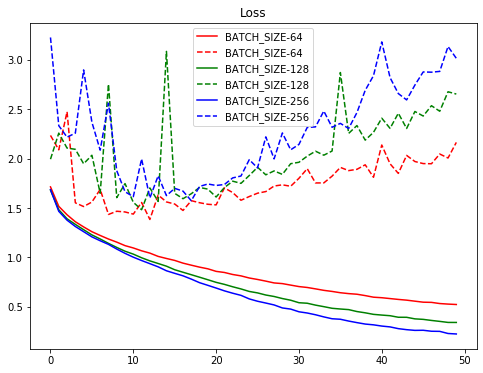

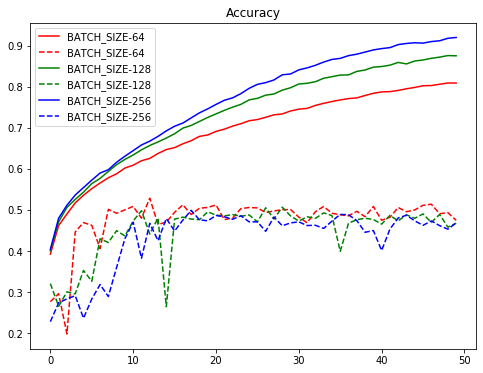

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()